In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv('fake_job_postings.csv')

In [3]:
data.head(1)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0


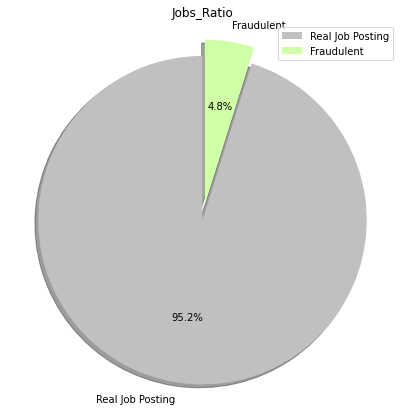

In [4]:
fake_count = data['fraudulent'].value_counts()[1]
real_count = data['fraudulent'].value_counts()[0]

labels = 'Real Job Posting', 'Fraudulent'
sizes = [ real_count,fake_count]
explode = (0, 0.1)

colors = ['#C0C0C0','#CFFFA6']
fig1, ax1 = plt.subplots(figsize = (7, 7))
ax1.pie(sizes, explode=explode, colors=colors, labels = labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Jobs_Ratio')
plt.legend()
plt.show()

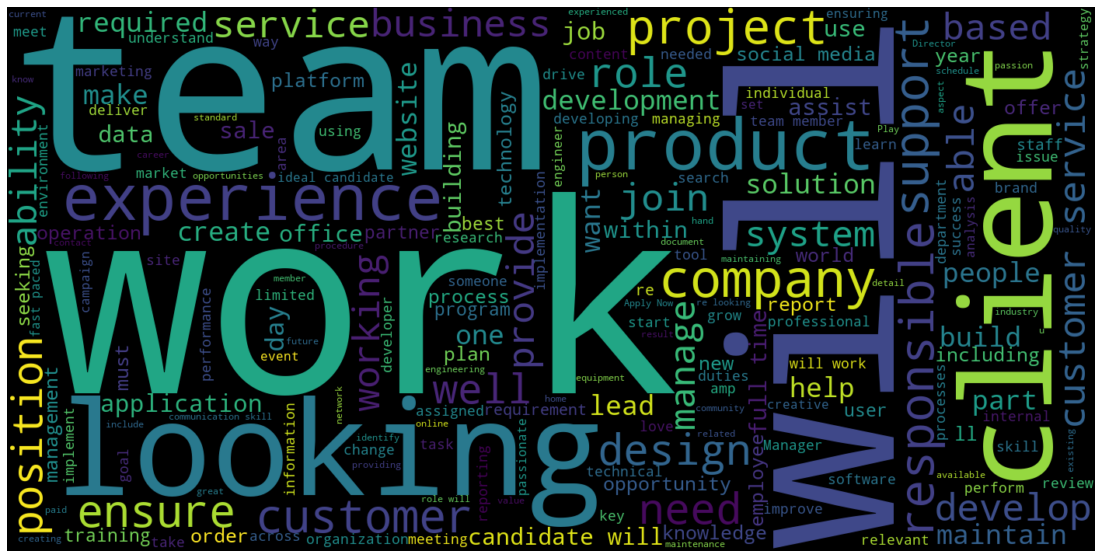

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

target_text = " ".join(data['description'])
wordcloud = WordCloud(width=1400, height=700).generate(text=target_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [3]:
text_col = ['title', 'department', 'company_profile', 'description', 'requirements',
       'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function']

In [4]:
data[text_col]=data[text_col].replace(np.nan,"")

In [5]:
data["text"]=""
for col in text_col:
    data["text"]=data["text"]+" "+data[col]

In [6]:
data['text'] = data['text'].astype(dtype=str)

In [8]:
# split into words
from nltk.tokenize import word_tokenize
# convert to lower case
# remove punctuation from each word
punct = str.maketrans('', '', string.punctuation)
# remove remaining tokens that are not alphabetic
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# stemming of words
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [9]:
tokens=[" "]
def cleaning(x):
    
    tokens = word_tokenize(x)
    tokens = [w.lower() for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [w for w in tokens if not w in stop_words]
    tokens = [porter.stem(word) for word in tokens]

    a =''
    for w in tokens:
        a = a +' '+ w
    tokens.clear()
    a = a.translate(punct)
    return a


In [10]:
data['text'] = data['text'].apply(lambda x:cleaning(x))

In [11]:
data['text'].iloc[0]

' market intern market creat groundbreak cook site support connect celebr home cook give everyth need one top editori busi engin team focus use technolog find new better way connect peopl around specif food interest offer superb highli curat inform food cook attract talent home cook contributor countri also publish profession like mario batali gwyneth paltrow danni meyer partnership whole food market random name best food websit jame beard foundat iacp featur new york time npr pando daili techcrunch today locat chelsea new york citi jame beard onlin food commun curat recip hub current interview unpaid intern work small team editor execut develop new york citi repackag exist content number partner site huffington post yahoo buzzfe variou content manag systemsresearch blog websit provis affili programassist affili program support screen affili assist affili inquiriessupport pr amp event neededhelp offic administr work file mail prepar meetingswork develop document bug suggest improv site

In [21]:
data_fake = data[data['fraudulent']==1]
data_real = data[data['fraudulent']==0].sample(n=1000)

In [22]:
data_filtered = pd.concat([data_fake,data_real],ignore_index=True)

In [24]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=6000)
xtrain_tfidf =  tfidf_vect.fit_transform(data_filtered['text'])

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
xtrain_pca = pca.fit_transform(xtrain_tfidf.toarray())

In [83]:
y = data['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(xtrain_pca, y, test_size=0.2)

model_pca = GaussianNB().fit(X_train,y_train)
pca_acc = model_pca.score(X_test,y_test)
print(pca_acc)

0.6476510067114094


In [25]:
from sklearn.preprocessing import MinMaxScaler
xtrain_scaler = MinMaxScaler().fit_transform(xtrain_tfidf.toarray())

In [26]:
y = data_filtered['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(xtrain_scaler, y, test_size=0.2)

model = GaussianNB().fit(X_train,y_train)
g_acc_1 = model.score(X_test,y_test)
print(g_acc_1)


0.8823529411764706


In [27]:
y = data_filtered['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(xtrain_scaler, y, test_size=0.2)

model_m = MultinomialNB().fit(X_train,y_train)
m_acc_1 = model_m.score(X_test,y_test)
print(m_acc_1)

0.9144385026737968


In [28]:
from sklearn.decomposition import NMF
xtrain_decom = NMF(n_components=2).fit_transform(xtrain_tfidf.toarray())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [29]:
y = data_filtered['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(xtrain_decom, y, test_size=0.2)

model_g = GaussianNB().fit(X_train,y_train)
g_acc_2 = model_g.score(X_test,y_test)
print(g_acc_2)

0.4839572192513369


In [30]:
y = data_filtered['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(xtrain_decom, y, test_size=0.2)

model_m = MultinomialNB().fit(X_train,y_train)
m_acc_2 = model_m.score(X_test,y_test)
print(m_acc_2)

0.5588235294117647


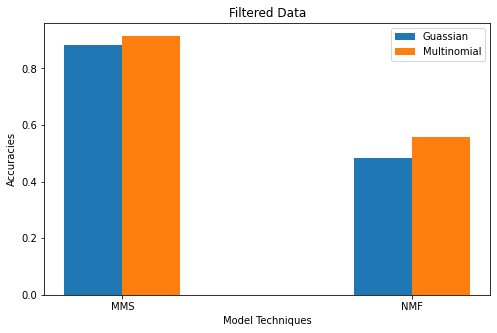

In [31]:
r1 = [g_acc_1,g_acc_2]
r2 = [m_acc_1,m_acc_2]
names =['MMS','NMF']
ind = np.arange(2)
plt.figure(figsize=(8,5))
width = 0.2
plt.bar(ind, r1 , width,label='Guassian')
plt.bar(ind + width , r2, width, label='Multinomial')
plt.xlabel('Model Techniques')
plt.ylabel('Accuracies')
plt.title('Filtered Data')
plt.xticks(ind + width / 2, names)
plt.legend(loc='best')

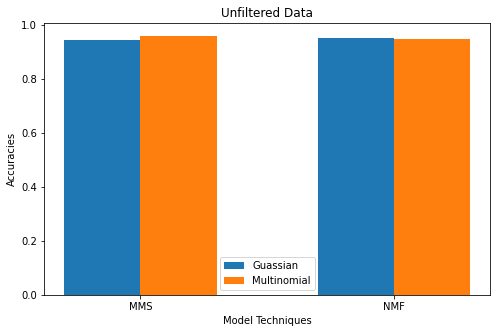

In [20]:
r1 = [g_acc_1,g_acc_2]
r2 = [m_acc_1,m_acc_2]
names =['MMS','NMF']
ind = np.arange(2)
plt.figure(figsize=(8,5))
width = 0.3 
plt.bar(ind, r1 , width, label='Guassian')
plt.bar(ind + width, r2, width, label='Multinomial')
plt.xlabel('Model Techniques')
plt.ylabel('Accuracies')
plt.title('Unfiltered Data')
plt.xticks(ind + width / 2, names)
plt.legend(loc='best')